# Decision Tree

## Example of gini index 
- calculating gini index 

prob(past trend == +ve) - 6/10
prob(past trend == -ve) - 4/10

prob(PT == +ve & return == up) -   4/6
prob(PT == +ve & return == down) - 2/6

gini index = 1 - ((4/6)^2 + (2/6)^2)  -- 0.45


prob(PT == -ve & return == up)   -  0/4
prob(PT == -ve & return == down) -  4/4  - 1

gini index = 1 - ((0/4)^2 + 1)  - (1 - 1) = 0


**gini index for Past Trend  = (6/10)*0.45 + (4/10)*0   === 0.27**


In [104]:
(6/10)*0.45

0.27

In [102]:
# 1 - ((4/6)^2 + (2/6)^2)
1- np.power((4/6),2) + np.power((2/6),2)

0.6666666666666667

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
df.shape

(768, 9)

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
X = df[df.columns[:-1]]
X.shape

(768, 8)

In [20]:
y = df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [22]:
from sklearn.tree  import DecisionTreeClassifier 

In [46]:
model = DecisionTreeClassifier(max_depth= 3)

In [47]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [48]:
y_pred = model.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
accuracy_score(y_test,y_pred) * 100 

71.86147186147186

In [51]:
confusion_matrix(y_test,y_pred)

array([[141,  10],
       [ 55,  25]], dtype=int64)

In [52]:
106+51  # 157 obversavations 

157

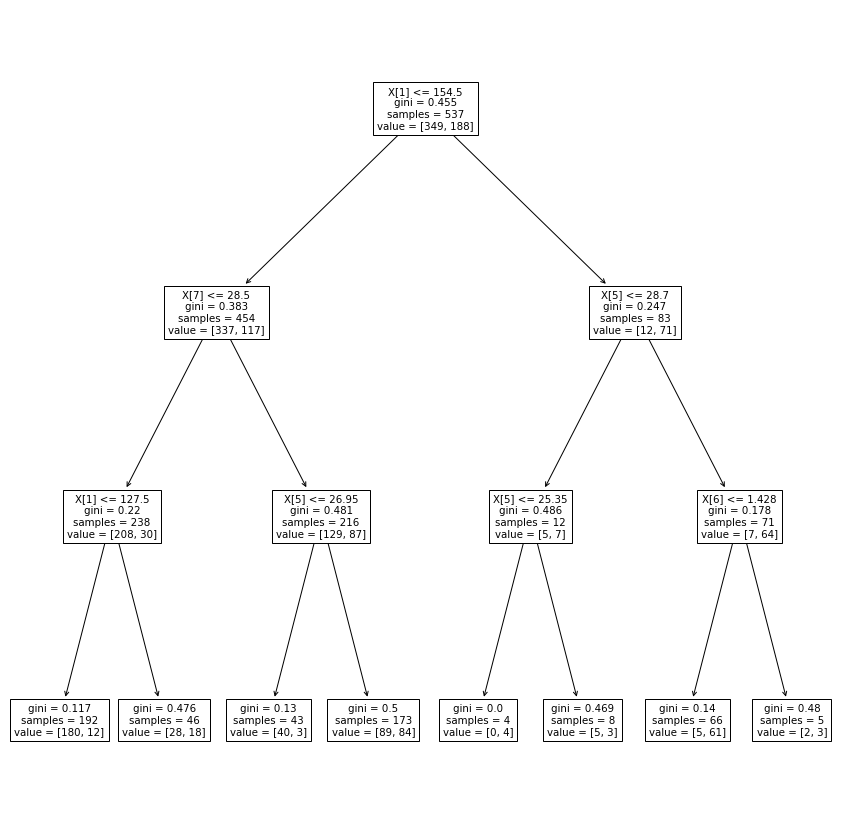

In [53]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model)
plt.show()

types :
- descrite variable decision tree
- Continous variable decision tree

- 2 algorithms 
    - CART  - classification and regression algorithm
        - gini index/ gini impurity
    - ID3  - iterative dechomister 3  
            - Information gain
            - log function / std deviation

In [54]:
df = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/age_salary_hours.csv")
df

,Age,Annual Salary,Weekly hours,Education
0,72,160000.0,40.0,Bachelor's degree or higher
1,72,100000.0,50.0,Bachelor's degree or higher
2,31,120000.0,40.0,Bachelor's degree or higher
3,28,45000.0,40.0,Bachelor's degree or higher
4,54,85000.0,40.0,Bachelor's degree or higher
...,...,...,...,...
495,27,47000.0,40.0,Bachelor's degree or higher
496,53,132000.0,70.0,Bachelor's degree or higher
497,51,10100.0,20.0,Bachelor's degree or higher
498,32,57000.0,35.0,Bachelor's degree or higher


In [55]:
df = df.drop("Education",axis = 1)

In [56]:
df

,Age,Annual Salary,Weekly hours
0,72,160000.0,40.0
1,72,100000.0,50.0
2,31,120000.0,40.0
3,28,45000.0,40.0
4,54,85000.0,40.0
...,...,...,...
495,27,47000.0,40.0
496,53,132000.0,70.0
497,51,10100.0,20.0
498,32,57000.0,35.0


In [57]:
df.shape

(500, 3)

In [58]:
df.isnull().sum()

Age              0
Annual Salary    0
Weekly hours     0
dtype: int64

In [60]:
X = df[["Age","Weekly hours"]]
X

,Age,Weekly hours
0,72,40.0
1,72,50.0
2,31,40.0
3,28,40.0
4,54,40.0
...,...,...
495,27,40.0
496,53,70.0
497,51,20.0
498,32,35.0


In [61]:
y = df["Annual Salary"]

In [66]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 1)

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
dtr = DecisionTreeRegressor(max_depth=3) 

In [92]:
dtr.fit(x_train,y_train) 

DecisionTreeRegressor(max_depth=3)

In [93]:
y_pred = dtr.predict(x_test)

In [94]:
dtr.score(x_test,y_pred) *100

100.0

In [98]:
mean_squared_error(y_test,y_pred)

13966676750.169922

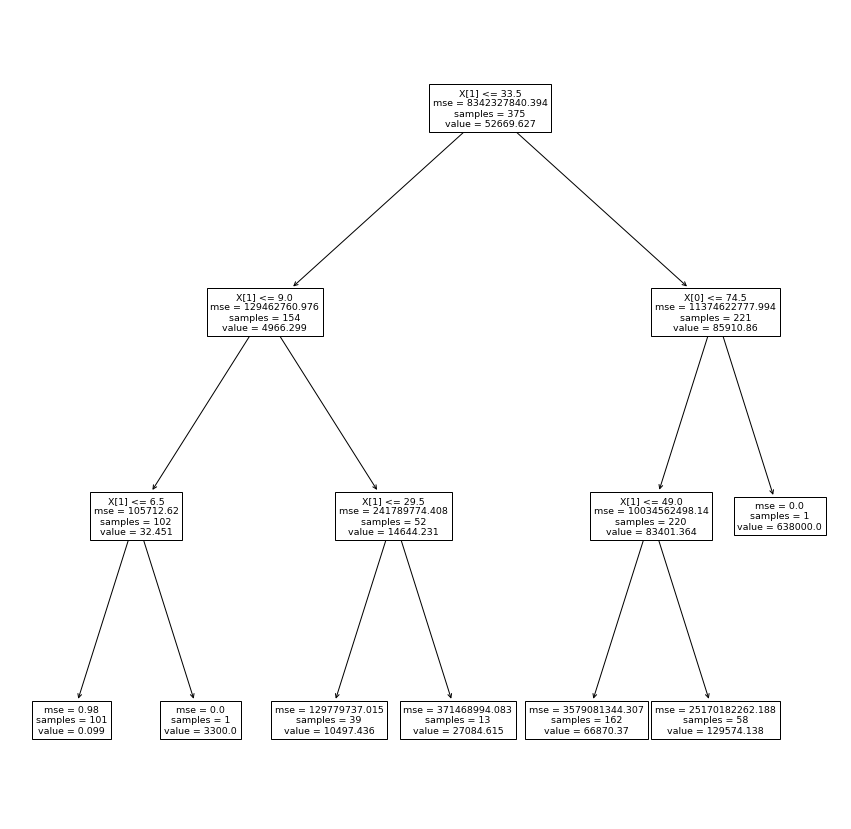

In [97]:
plt.figure(figsize = (15,15))
tree.plot_tree(dtr)
plt.show()

# Task :
- Take decisionTree Classifier
- take Iris dataset from sklearn 
- Plot the decision tree
- Observe the no.of  samples at leaves and gini index at root node 
